# Machine Learning course

For any doubts/questions feel free to contact us by using the forum on ILIAS.


---


As your environment you can use Google Colab or just set up your own Python/[Jupyter](https://jupyter.org/install) environment.

# Python refresher

This notebook reviews the usage of the Python language, in patricular of the today mostly used libraries for scientific computing [NumPy](https://numpy.org/) and [Pytorch](https://pytorch.org/).


## Fibonacci: The Very Basic Python

This exercise is only designed to refresh your "very basic python" skills.

We are supposed to write a function computing the Fibonacci's i-th element.

We want to find the $i$-th element of the Fibonacci function as it is $$f(i) = f(i - 1) + f(i - 2)$$

In [ ]:
# @title 👀 Solution

def fib(n):
  if n < 2:
    return 1
  else:
    computed_fib_result = [1, 1]

    for i in range(len(computed_fib_result), n + 1):
      value = computed_fib_result[i - 1] + computed_fib_result[i - 2]
      computed_fib_result.append(value)

    return computed_fib_result[-1]

In [ ]:
fib(10)

89

In [ ]:
[fib(n) for n in range(10 + 1)]

[1, 1, 2, 3, 5, 8, 13, 21, 34, 55, 89]

## Numpy and PyTorch

The main common feature of these two frameworks is the adoption of tensors as the fundamental data structure. Numpy was the first library introducing a convenient Python interface for working with multi-dimensional array data structures efficiently and for this reason we will focus on it in this notebook. Subsequently, Pytorch (but also other deep learning frameworks) builds on it by introducing new functionalities like the support for GPU to speed up the computation.

Note that most of the examples presented in NumPy can be done analogously in Pytorch. When it doesn't apply straightforwardly we will indicate it.

In [ ]:
import numpy as np
import torch

# NumPy

NumPy is built around `ndarrays` objects, which are high-performance multi-dimensional array data structures. Intuitively, we can think of a one-dimensional NumPy array as a data structure to represent a vector of elements – you may think of it as a fixed-size Python list where all elements share the same type. Similarly, we can think of a two-dimensional array as a data structure to represent a matrix or a Python list of lists.

### Tensor instantiation
Tensors in NumPy are instantiated using the function `array` and passing to it a Python list of homogeneous elements

In [ ]:
np.array([1, 2, 3, 4])

array([1, 2, 3, 4])

NumPy also comes with functions to directly create special kind of tensors

In [ ]:
np.ones((3, 4))

array([[1., 1., 1., 1.],
       [1., 1., 1., 1.],
       [1., 1., 1., 1.]])

In [ ]:
np.zeros((3, 3))

array([[0., 0., 0.],
       [0., 0., 0.],
       [0., 0., 0.]])

In [ ]:
np.eye(4)

array([[1., 0., 0., 0.],
       [0., 1., 0., 0.],
       [0., 0., 1., 0.],
       [0., 0., 0., 1.]])

It is also possible to create tensors representing a sequence of numbers.
- NumPy’s `arange` function follows the same syntax as Python’s `range` objects: If two arguments are provided, the first argument represents the start value and the second value defines the stop value of a half-open interval
- The linspace function is especially useful if we want to create a particular number of evenly spaced values in a specified half-open interval

In [ ]:
np.arange(0, 10)

array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9])

In [ ]:
np.linspace(6., 15., num=10)

array([ 6.,  7.,  8.,  9., 10., 11., 12., 13., 14., 15.])

### Tensor properties

By default, NumPy infers the **type** of the tensor upon construction

In [ ]:
t = np.array([1., 2., 3.])
t.dtype

dtype('float64')

If we want to construct NumPy arrays of different types, we can pass an argument to the dtype parameter of the array function

In [ ]:
t = np.array([[1, 2, 3], [1, 2, 3]], dtype=np.float32)
t

array([[1., 2., 3.],
       [1., 2., 3.]], dtype=float32)

Once an array has been constructed, we can downcast or recast its type via the astype method

In [ ]:
t = t.astype(np.int32)
t

array([[1, 2, 3],
       [1, 2, 3]], dtype=int32)

To return the **number of elements** in an array, we can use the `size` attribute

In [ ]:
t.size

6

If we are interested in the **number of elements along each array dimension** we can access the `shape` attribute

In [ ]:
t.shape

(2, 3)

And the **number of dimensions** of a tensor, usually referred to as *rank*, can be obtained via the `ndim` attribute:
- **rank-0** tensors are just scalars
- **rank-1** tensors of length ``n`` have a shape of ``(n,)``
- **rank-2** tensors have a shape of ``(n, m)``
- **rank-k** tensors have a shape of $(n_1, \dots, n_k)$

What's the rank of the tensor $t$?

In [ ]:
# @title 👀 Solution

# t.ndim

### Tensor manipulations

Tensors can be manipulated in different ways: by transposing, reshaping or concatenatig them. Several functionalities are provided to perform the aforementioned operations.

#### Tranpose

NumPy arrays have a handy transpose method to transpose $k$-D tensors, where you can specify an entire mapping to change all the dimensions.

In [ ]:
a = np.arange(10).reshape(2, 5)
a

array([[0, 1, 2, 3, 4],
       [5, 6, 7, 8, 9]])

In [ ]:
a.transpose(1, 0)

array([[0, 5],
       [1, 6],
       [2, 7],
       [3, 8],
       [4, 9]])

In [ ]:
a.transpose(0, 1)

array([[0, 1, 2, 3, 4],
       [5, 6, 7, 8, 9]])

`T` is the shorthand to transpose tensors

In [ ]:
a.T

array([[0, 5],
       [1, 6],
       [2, 7],
       [3, 8],
       [4, 9]])

#### Reshape

In practice, we often run into situations where existing arrays do not have the right shape to perform certain computations. As you might remember from the beginning of this article, the size of NumPy arrays is fixed. Fortunately, this does not mean that we have to create new arrays and copy values from the old array to the new one if we want arrays of different shapes – the size is fixed, but the shape is not. NumPy provides a reshape methods that allow us to obtain a view of an array with a different shape.

In [ ]:
a = np.array([1, 2, 3, 4, 5, 6])
a2d = a.reshape(2, 3)
a2d

array([[1, 2, 3],
       [4, 5, 6]])

While we need to specify the desired elements along each axis, we need to make sure that the reshaped array has the same number of elements as the original one. However, we do not need to specify the number elements in each axis; NumPy is smart enough to figure out how many elements to put along an axis if only one axis is unspecified (by using the placeholder -1)

In [ ]:
a.reshape(-1, 3)

array([[1, 2, 3],
       [4, 5, 6]])

Transposing and Reshaping are two **fundamentally different** operations

In [ ]:
a = np.arange(12).reshape(3, 4)
a

array([[ 0,  1,  2,  3],
       [ 4,  5,  6,  7],
       [ 8,  9, 10, 11]])

In [ ]:
# The classical transpose
a.T

array([[ 0,  4,  8],
       [ 1,  5,  9],
       [ 2,  6, 10],
       [ 3,  7, 11]])

In [ ]:
# Reshape into the transpose shape
a.reshape(4, 3)

array([[ 0,  1,  2],
       [ 3,  4,  5],
       [ 6,  7,  8],
       [ 9, 10, 11]])

Think of the `reshape` operation as unrolling the tensor **row-wise**, to obtain a rank-1 tensor. Then organize the values in this tensor following the specified dimensions.

```python
array([[ 0,  1,  2,  3],
        [ 4,  5,  6,  7],
        [ 8,  9, 10, 11]])
```
$-$ unrolling $ \to $

```python
array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11])
```

Then, reading the target shape from right to left, organize the values into the dimensions:

- e.g. reshape into `[4, 3]`:

```python
array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11])
```

$-$ organize in groups of $3$ $ \to $

```python
array([[0,  1,  2],  [3,  4,  5],  [6,  7,  8],  [9, 10, 11]])
```

$-$ organize in groups of $4$ $ \to $

```python
array([[ 0,  1,  2],
        [ 3,  4,  5],
        [ 6,  7,  8],
        [ 9, 10, 11]])

# same shape of corresponding transpose but it **is** different
```

- e.g. reshape into `[2, 2, 3]`:

```python
array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11])
```

$-$ organize in groups of $3$ $ \to $

```python
array([[0,  1,  2],  [3,  4,  5],  [6,  7,  8],  [9, 10, 11]])
```

$-$ organize in groups of $2$ $ \to $

```python
array([[[0,  1,  2],  [3,  4,  5]],  [[6,  7,  8],  [9, 10, 11]]])
```

$-$ organize in groups of $2$ $ \to $

```python
array([[[ 0,  1,  2],
         [ 3,  4,  5]],

        [[ 6,  7,  8],
         [ 9, 10, 11]]])
```

#### Concatenation

Sometimes, we are interested in merging different arrays. Unfortunately, there is no efficient way to do this without creating a new array, since NumPy arrays have a fixed size. To combine two or more array objects, we can:
- `numpy.concatenate` concatenates in the *given* dimension (Pytorch version: `torch.cat`)
- `numpy.stack` concatenates along a *new* dimension (Pytorch version: `torch.stack`)

In [ ]:
arr = np.array([4, 7, 12])
arr1 = np.array([5, 9, 15])

In [ ]:
np.stack((arr, arr1))

array([[ 4,  7, 12],
       [ 5,  9, 15]])

In [ ]:
np.stack((arr, arr1), axis=1)

array([[ 4,  5],
       [ 7,  9],
       [12, 15]])

In [ ]:
np.concatenate((arr, arr1))

array([ 4,  7, 12,  5,  9, 15])

In [ ]:
arr = np.array([[4, 6], [9, 13]])
arr1 = np.array([[8, 3], [12, 19]])

np.concatenate((arr, arr1), axis=1)

array([[ 4,  6,  8,  3],
       [ 9, 13, 12, 19]])

### **Excercises**

1. Create a 3x3 tensor with equally spaced values between 0 and 10
2. Using the shape of the previous tensor, create an identity matrix with the same shape
3. Given a tensor with shape `(5, 10, 6, 7)`, rearrange it to obtain a shape `(5, 6, 7, 10)` (generate the tensor to manipulate using the following command `a = np.random.rand(5,10,6,7)`)
4. Create a tensor with shape `(5, 8)` where the first 4 columns are all zeros and the last 4 columns are all ones
5. Consider the following tensor `a = np.arange(10)`, manipulate it in such a way to obtain `array([0, 5, 1, 6, 2, 7, 3, 8, 4, 9])`

### Tensor indexing and slicing

Retrieving NumPy array elements can be done via different indexing methods.

Also **be careful** that slice and indexing operation returns a view of the original tensor. As a consequence by assigning to sliced tensors will modify the original one.

#### Standard indexing and sliding

Simple NumPy indexing works similar to Python lists:

In [ ]:
a = np.arange(10)
a

array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9])

In [ ]:
print(a[0])  # first element
print(a[1])  # second element

0
1


In [ ]:
print(a[-1])  # last element
print(a[-2])  # second last element

9
8


When tensors are multidimensional, you can specify one index for each dimension:

In [ ]:
a = np.arange(10).reshape(2, 5)
a

array([[0, 1, 2, 3, 4],
       [5, 6, 7, 8, 9]])

In [ ]:
a[1, 3]

8

In [ ]:
print(a[0]) # first row
print(a[1]) # second row

[0 1 2 3 4]
[5 6 7 8 9]


In [ ]:
a[0, -1]

4

Simple slicing works similar to Python lists as well:

In [ ]:
a = np.arange(10) + 10
a

array([10, 11, 12, 13, 14, 15, 16, 17, 18, 19])

In [ ]:
# Take the elements in positions 5..6
a[5:7]

array([15, 16])

In [ ]:
# Take the last 5 elements
a[-5:]

array([15, 16, 17, 18, 19])

In [ ]:
# a[start:stop:step] from start to at most stop-1, by step
# Select every element having an even index
a[::2]

array([10, 12, 14, 16, 18])

Multidimensional slicing is possible as well:

In [ ]:
a = np.arange(10).reshape(2, 5)
a

array([[0, 1, 2, 3, 4],
       [5, 6, 7, 8, 9]])

In [ ]:
# Take the second column
a[:, 1]

array([1, 6])

In [ ]:
# Take the last column
a[:, -1]

array([4, 9])

In [ ]:
# Take a slice from the last row
a[-1, -3:]

array([7, 8, 9])

#### Fancy indexing and slicing

Via fancy indexing, we can use tuple or list objects of non-contiguous integer indices to return desired array elements. Since fancy indexing can be performed with non-contiguous sequences, it cannot return a view – a contiguous slice from memory. Thus, fancy indexing always returns a copy of an array – it is important to keep that in mind.

In [ ]:
a = np.arange(1, 7).reshape(3, 2)
a[[0, 1, 2], [0, 1, 0]]

array([1, 4, 5])

In [ ]:
# Equivalent to
v1, v2, v3 = a[0, 0], a[1, 1], a[2, 0]
np.array([v1, v2, v3])

array([1, 4, 5])

Differently, fancy slicing returns a sub-tensor

In [ ]:
a = np.arange(16).reshape(4, 4)
a

array([[ 0,  1,  2,  3],
       [ 4,  5,  6,  7],
       [ 8,  9, 10, 11],
       [12, 13, 14, 15]])

In [ ]:
a[0:5:2, 0:5:2]

array([[ 0,  2],
       [ 8, 10]])

#### Boolean mask for indexing

We can also use Boolean masks for indexing – that is, arrays of `True` and `False` values, and it is used to select the elements of a tensor that satisfy some condition.

In [ ]:
a = np.arange(6).reshape(3, 2)
a

array([[0, 1],
       [2, 3],
       [4, 5]])

In [ ]:
bool_idx = (a > 2)
bool_idx

array([[False, False],
       [False,  True],
       [ True,  True]])

In [ ]:
a[bool_idx]

array([3, 4, 5])

Using comparison operators (such as `<`, `>`, `<=`, and `>=`), we can create a Boolean mask of that array which consists of `True` and `False` elements depending on whether a condition is met in the target array

In [ ]:
a = np.array([1, 2, 3, 4, 5])
mask = a > 2
a[mask]

array([3, 4, 5])

Logical operators allow us to chain an arbitrary number of conditions to create even more “complex” boolean masks:
- and: `&`
- or: `|`
- xor: `^`
- not: `~`

In [ ]:
a = np.array([1, 2, 3, 4, 5])
a[(a > 3) | (a < 2)]

array([1, 4, 5])

A useful function to assign values to specific elements in an array is the `np.where` function.


In [ ]:
a = np.array([1, 2, 3, 4, 5])

np.where(a > 2, 1, 0) # assign 1 to all values in the array that are greater than 2 – and 0, otherwise

array([0, 0, 1, 1, 1])

### Excercises

1. Given a $m \times n$ dimensional tensor, replace the values of the last 3 columns with a $0$. (start from the array generated by `np.arange(4*6).reshape(4,6)`)
2. Create a block diagonal matrix starting from `np.zeros((20,20))` with $5 \times 5$ blocks
3. Given a $n \times n$ tensor representing a weighted graph, create an integer-valued tensor where a value of 1 is replaced if the weight of the edge is greater than a threshold (consider the following tensor `np.random.rand(7,7)` and the threshold equals to $0.5$)
4. Select the weights of all the edges in the matrix of Ex. 3 that are not self-loops (that are the edges where the index of the row and of the column match). *Hint:* you may need some function from the [documentation](https://numpy.org/doc/stable/reference/routines.sort.html)
5. Create a tensor with shape `(5, 5)` with ones along the diagonal and anti-diagonal

### Basic math operations

While for-loops are usually used to perform arithmetic operations on Python sequence-like objects, NumPy's efficient vectorized versions make the library popular in the scientific community.

Many [*ufuncs*](https://numpy.org/doc/stable/reference/ufuncs.html#available-ufuncs) operating element-by-element are implemented in compiled C code and very fast and efficient compared to vanilla Python.

In [ ]:
lst = [[1, 2, 3],
       [4, 5, 6]]

for row_idx, row_val in enumerate(lst):
    for col_idx, col_val in enumerate(row_val):
        lst[row_idx][col_idx] += 1
lst

[[2, 3, 4], [5, 6, 7]]

In [ ]:
a = np.array([[1, 2, 3], [4, 5, 6]])
a = np.add(a, 1) # binary ufunc
a

array([[2, 3, 4],
       [5, 6, 7]])

NumPy uses operator overloading so that we can use mathematical operators (`+`, `-`, `/`, `*`, and `**`) directly.

In [ ]:
a + 1

array([[3, 4, 5],
       [6, 7, 8]])

In [ ]:
np.power(a, 2)

array([[ 4,  9, 16],
       [25, 36, 49]])

In [ ]:
a**2

array([[ 4,  9, 16],
       [25, 36, 49]])

When dealing with multidimensional tensors, we may want to compute the sum or product of array element along a given axis.

Think of the `axis` parameter as an index over the tensor's `shape`. The operation will be performed by iterating over that dimension.

In [ ]:
a = np.array([[1, 2, 3],
              [4, 5, 6]])

In [ ]:
a.sum(axis=0) # column sums

array([5, 7, 9])

In [ ]:
a.sum(axis=1) # row sums

array([ 6, 15])

### Excercises

1. The l2 norm of a vector is defined as following:
$$
{\displaystyle \|{\boldsymbol {x}}\|_{2}:={\sqrt {x_{1}^{2}+\cdots +x_{n}^{2}}}.}
$$
Compute the l2 norm of the following tensor `np.arange(15)` by just using ufuncs
2. Given the following tensor `np.random.randint(2, size=(10,25))`, return:
  - a new tensor where in position $i$ there is the number of $1$ in the $i$th column
  - a new tensor where in position $i$ there is the number of $1$ in the $i$th row
3. Create a $6 \times 6$ tensor filled with $2$s along the diagonal and $1$s in non-diagonal entries
4. Compute the column-wise mean of the following tensor `np.array([[4, 5, 6,], [7, 8, 9]])`

### Broadcasting

Broadcasting allows us to perform vectorized operations between two arrays even if their dimensions do not match by creating implicit multidimensional grids.
![broadcasting.png](https://sebastianraschka.com/images/blog/2020/numpy-intro/broadcasting-2.png)

In [ ]:
a = np.array([[4, 5, 6],
              [7, 8, 9]])

a2 = np.array([1,2,3])

a + a2

array([[ 5,  7,  9],
       [ 8, 10, 12]])

Two tensors are "broadcastable" if:
- Each tensor has at least one dimension
- Starting at the trailing dimension, the dimension must either **be equal**, **one of them is 1**, or **one of them does not exist**.

---

Broadcasting two tensors together follows these rules:

1. If the input tensors have different ranks, **singleton dimensions are prepended to the shape** of the smaller one until it has the same rank as the other

2. The size in each dimension of the **output shape** is the maximum size in that dimension between the two tensors

3. An input can be used in the computation if its size in a particular **dimension either matches** the output size in that dimension, **or is a singleton dimension**

4. If an input has a dimension size of 1 in its shape, the **first data entry in that dimension will be used for all calculations** along that dimension.


Check out the [following resources](https://docs.scipy.org/doc/numpy/user/basics.broadcasting.html) for more information about broadcasting.

In [ ]:
a1 = np.arange(12).reshape(4, 3)
a2 = np.array([0, 10, 20])
a1

array([[ 0,  1,  2],
       [ 3,  4,  5],
       [ 6,  7,  8],
       [ 9, 10, 11]])

In [ ]:
a1 * a2

array([[  0,  10,  40],
       [  0,  40, 100],
       [  0,  70, 160],
       [  0, 100, 220]])

In [ ]:
a3 = np.arange(1, 5).reshape(4,1)
a3

array([[1],
       [2],
       [3],
       [4]])

In [ ]:
a1 / a3

array([[0.        , 1.        , 2.        ],
       [1.5       , 2.        , 2.5       ],
       [2.        , 2.33333333, 2.66666667],
       [2.25      , 2.5       , 2.75      ]])

### Excerises

1. Given 10 different 3D points stored in the following tensor `np.random.random((10, 3))` of shape `(10, 3)`, center the points in the mean.
2. Given a real-valued tensor with shape $m \times n$ representing $n$ features for each of the $m$ points `np.arange(6*20).reshape(6, 20)`. Normalize the features of each point by dividing for the sum.

### Linear algebra

One-dimensional tensors can intuitively be considered as row vectors

In [ ]:
row_vector = np.array([1, 2, 3])
row_vector

array([1, 2, 3])

We can compute the dot-product of two tensors by using the `dot` function.

Given $x \in R^k$ and $y \in R^k$, the dot product $z \in R$ is defined as:

$$z = \sum_{i=0}^{k} x_i y_i$$

In [ ]:
np.dot(row_vector, row_vector)

14

Column vectors can also be created using two-dimensional arrays. *Use None to add a new axis.*

In [ ]:
column_vector = row_vector[:, None]
column_vector

array([[1],
       [2],
       [3]])

In [ ]:
# recall that slicing creates a view of the tensor, not a copy
row_vector[0] = 0
column_vector

array([[0],
       [2],
       [3]])

Similarly, matrix multiplication can be performed using the `dot` function. Even though NumPy's underlying implementation is different, its `matmul` function behaves exactly the same.

Given $X \in R^{n \times d}$ and $Y \in R^{d \times v}$, their matrix multiplication $Z \in R^{n \times v}$ is defined as:

$$ \sum_{k=0}^{d} x_{ik} y_{kj} = z_{ij} $$

In [ ]:
matrix = np.array([[1, 2, 3],
                   [4, 5, 6]])
np.matmul(matrix, column_vector)

array([[13],
       [28]])

Broadcasting allows us to perfom anyway matrix multiplication even if the dimensions of matrices and one-dimensional arrays do not match exactly. The only different is the **output** shape.

In [ ]:
np.matmul(matrix, row_vector)

array([13, 28])

Obviously, matrix multiplication can also be performed between two matrices:

In [ ]:
np.matmul(matrix, matrix.T)

array([[14, 32],
       [32, 77]])

Note that the operator `@` is overloaded by NumPy to perform matrix multiplication

In [ ]:
matrix @ matrix.T

array([[14, 32],
       [32, 77]])

It is possible also to compute batched matrix multiplication:

Given two 3D tensors, each one containing ``b`` matrices,
$X \in R^{b \times n \times m}$
and  
$Y \in R^{b \times m \times p}$,

We want to multiply together each $i$-th couple of matrices, obtaining a tensor $Z \in R^{b \times n \times p}$ defined as:

$$ z_{bij} = \sum_{k=0}^m x_{bik} y_{bkj} $$

In [ ]:
bm = np.array([[[1, 2], [3, 4], [5, 6]], [[1, 2], [3, 4], [5, 6]]])
m = np.array([[[1, 2], [2, 1]], [[1, 2], [2, 1]]])

In [ ]:
bm

array([[[1, 2],
        [3, 4],
        [5, 6]],

       [[1, 2],
        [3, 4],
        [5, 6]]])

In [ ]:
m

array([[[1, 2],
        [2, 1]],

       [[1, 2],
        [2, 1]]])

In [ ]:
bm @ m

array([[[ 5,  4],
        [11, 10],
        [17, 16]],

       [[ 5,  4],
        [11, 10],
        [17, 16]]])

### Excerices

1. Given a tensor `np.arange(2*3*2).reshape(2,3,2)` with shape `(2, 3, 2)` representing $2$ different $3\times2$ matrices and two matrices `l1 = np.array([0,1])` and `l2 = np.array([1,0.5])` representing two different linear transformations (element swap and halves of the second element, respectively). Apply both the transformations to the batched matrices. *Hint:* Look at the rules of broadcasting.

### PyTorch

As previously anticipated, all the explained rules hold for PyTorch tensors as well. Here, we present one heavily used pytorch function in machine learning whose behaviour is different than Numpy. In general, the way-to-go is to always look at the respective documentations if in doubt:
- [Numpy doc](https://numpy.org/doc/stable/reference/index.html#reference)
- [PyTorch doc](https://pytorch.org/docs/stable/index.html)

In [ ]:
t = torch.tensor([[3.1415926, 2.71828], [1.61803, 0.0072897]])
t

tensor([[3.1416, 2.7183],
        [1.6180, 0.0073]])

In **Pytorch**, it is possible to easily convert to/from NumPy tensors

In [ ]:
t = torch.ones((3, 3), dtype=torch.float32)
t.numpy()

array([[1., 1., 1.],
       [1., 1., 1.],
       [1., 1., 1.]], dtype=float32)

In [ ]:
n = np.zeros((3,3)).astype(np.float16)
torch.from_numpy(n)

tensor([[0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.]], dtype=torch.float16)

**NB:** In PyTorch the `transpose` function swaps just two dimensions

In [ ]:
a = torch.arange(10).reshape(2, 5)
a

tensor([[0, 1, 2, 3, 4],
        [5, 6, 7, 8, 9]])

In [ ]:
a.transpose(0,1)

tensor([[0, 5],
        [1, 6],
        [2, 7],
        [3, 8],
        [4, 9]])

### The vectorized Fibonacci

Now we try to solve the Fibonacci exercise with a linear algebraic approach.
First we use the equation:

$$f(i) = f(i - 1) + f(i - 2)$$

and we write the combination as a matrix format

$$ \begin{pmatrix} f_{i} \\ f_{i-1} \end{pmatrix} = \begin{pmatrix} 1 & 1 \\ 1 & 0 \end{pmatrix} \begin{pmatrix} f_{i-1} \\ f_{i-2} \end{pmatrix}$$

In [ ]:
vec = torch.tensor([[1.], [0.]])
coef = torch.tensor([[1., 1.], [1., 0.]])

coef @ (coef @ (coef @ vec))

tensor([[3.],
        [2.]])

Now there are many ways to reach the result:

1. `for` loop
2. Matrix power
3. Eigen decomposition
4. ...

#### 1. `for` loop:

In [ ]:
n = 10
res = vec.clone()
for _ in range(n):
  res = coef @ res
res

tensor([[89.],
        [55.]])

#### 2. Matrix Power

In [ ]:
n = 10
coef_n = torch.matrix_power(coef, n)
res = coef_n @ vec
res

tensor([[89.],
        [55.]])

#### 3. Eigen decomposition

Leveragin the change of basis, Fibonacci can be computed performing an eigen decomposition. In particular:

$$ \begin{pmatrix} f_{i} \\ f_{i-1} \end{pmatrix} = \Sigma (\lambda \mathbf{I}) ^n \Sigma^{-1}\begin{pmatrix} f_{i-1} \\ f_{i-2} \end{pmatrix}$$

In [ ]:
n = 10
eig_vals, eig_vecs = torch.linalg.eig(coef)
P = (eig_vecs @ torch.matrix_power(torch.diag(eig_vals), n) @ torch.inverse(eig_vecs)).real
P @ vec

<ipython-input-90-7e4ca8735c24>:3: UserWarning: Casting complex values to real discards the imaginary part (Triggered internally at ../aten/src/ATen/native/Copy.cpp:301.)
  P = (eig_vecs @ torch.matrix_power(torch.diag(eig_vals), n) @ torch.inverse(eig_vecs)).float()


tensor([[89.0000],
        [55.0000]])

## Loading Different Data

In Machine Learning most of the time you will deal with data. [scikit-learn](https://scikit-learn.org/stable/modules/classes.html) is a python library for solving machine learning problems (supervised, unsupervised, ...), manily built on Numpy. It provides some datasets, models and API to easily play around with different ML pipelines.

In the following, we:
* load a dataset called iris
* plot some dimensional slice of the mentioned data
* filter the datapoints based on target class
* try to compute some arithmetic operations with it

In [ ]:
from sklearn.datasets import load_iris
import matplotlib.pyplot as plt

Let's first load the Iris dataset, look at the description and show some features.

In [ ]:
iris_dataset = load_iris()
iris_dataset.keys()

dict_keys(['data', 'target', 'frame', 'target_names', 'DESCR', 'feature_names', 'filename', 'data_module'])

In [ ]:
print(iris_dataset.DESCR)

.. _iris_dataset:

Iris plants dataset
--------------------

**Data Set Characteristics:**

    :Number of Instances: 150 (50 in each of three classes)
    :Number of Attributes: 4 numeric, predictive attributes and the class
    :Attribute Information:
        - sepal length in cm
        - sepal width in cm
        - petal length in cm
        - petal width in cm
        - class:
                - Iris-Setosa
                - Iris-Versicolour
                - Iris-Virginica
                
    :Summary Statistics:

    ============== ==== ==== ======= ===== ====================
                    Min  Max   Mean    SD   Class Correlation
    ============== ==== ==== ======= ===== ====================
    sepal length:   4.3  7.9   5.84   0.83    0.7826
    sepal width:    2.0  4.4   3.05   0.43   -0.4194
    petal length:   1.0  6.9   3.76   1.76    0.9490  (high!)
    petal width:    0.1  2.5   1.20   0.76    0.9565  (high!)
    ============== ==== ==== ======= ===== ===========

In [ ]:
iris_x = iris_dataset.data
iris_y = iris_dataset.target

iris_x.shape, iris_y.shape

((150, 4), (150,))

Let's look at the correlation between the first and second dimension of the features

In [ ]:
# @title 👀 Solution

first_dim = iris_x[:, 0]
second_dim = iris_x[:, 1]

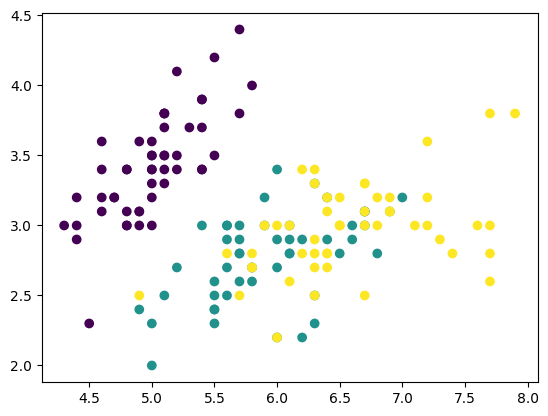

In [ ]:
plt.scatter(first_dim, second_dim, c=iris_y)

Select only the points belonging to class `1`

In [ ]:
# @title 👀 Solution

cls_mask = iris_y == 1

first_dim = iris_x[cls_mask, 0]
second_dim = iris_x[cls_mask, 1]

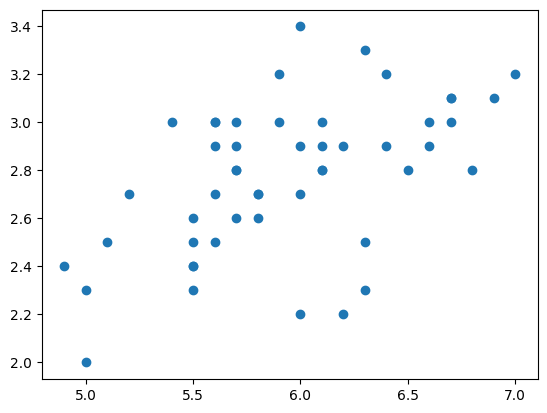

In [ ]:
plt.scatter(first_dim, second_dim)

In [ ]:
iris_x[iris_y == 0].mean(axis=0)

array([5.006, 3.428, 1.462, 0.246])

In [ ]:
np.concatenate([iris_x[iris_y == i].mean(axis=0) for i in range(iris_y.max() + 1)])

array([5.006, 3.428, 1.462, 0.246, 5.936, 2.77 , 4.26 , 1.326, 6.588,
       2.974, 5.552, 2.026])

Now, compute the expected feature vector for each class, then show how far each point of that class is from the center.

In [ ]:
# @title 👀 Solution
means = np.stack([iris_x[iris_y == i].mean(axis=0) for i in range(iris_y.max() + 1)])

# Advanced
# Pandas is another python library for data analysyis (https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.html)

# import pandas as pd

# iris_df = pd.DataFrame(iris_x)
# iris_df['label'] = iris_y

# means = iris_df.groupby('label').mean().values

In [ ]:
means

array([[5.006, 3.428, 1.462, 0.246],
       [5.936, 2.77 , 4.26 , 1.326],
       [6.588, 2.974, 5.552, 2.026]])

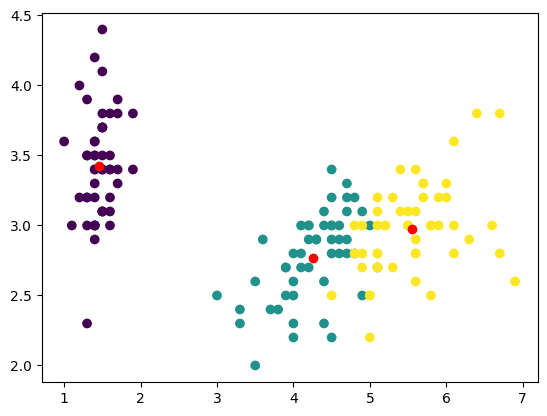

In [ ]:
plt.scatter(iris_x[:, 2], iris_x[:, 1], c=iris_y)
plt.scatter(means[:, 2], means[:, 1], color="red")

As distances, we can consider the $\ell_2$ norm

$$
\|\mathbf{x}\|_2=\left[\sum_{k} a b s\left(a_{k}\right)^2\right]^{1 / 2}
$$

In [ ]:
class_dist = np.linalg.norm(iris_x[iris_y == 0] - means[0], axis=1)
other_class_dist = np.linalg.norm(iris_x[iris_y != 0] - means[0], axis=1)

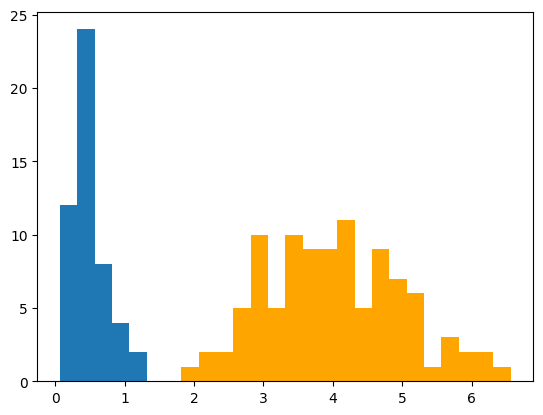

In [ ]:
binwidth = 0.25
bins = np.arange(min(class_dist.min(), other_class_dist.min()), max(class_dist.max(), other_class_dist.max()) + binwidth, binwidth)

counts, bins, _ = plt.hist(class_dist, bins=bins)
other_counts, other_bins, _ = plt.hist(other_class_dist, bins=bins, color="orange")

Apply the min max normalization over the data
$$n = \frac{x - min(x)}{max(x) - min(x)}$$

In [ ]:
# @title 👀 Solution
iris_x_normal = (iris_x - iris_x.min(axis=0)) / (iris_x.max(axis=0) - iris_x.min(axis=0))

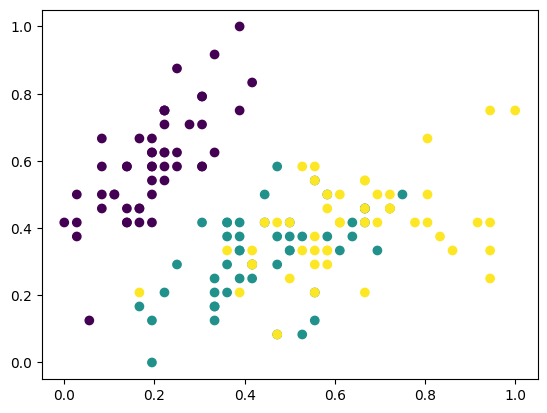

In [ ]:
plt.scatter(iris_x_normal[:, 0], iris_x_normal[:, 1], c=iris_y)

## Graph Adjacency Matrix

When dealing with graph data, you can instead using the [NetworkX](https://networkx.org/documentation/stable/) library, which provides built in function for plotting graphs along with other operations (like `connected_components`, ...)

In [ ]:
import networkx as nx
import matplotlib.pyplot as plt

In [ ]:
adjacency_matrix = (torch.rand(10, 10) < 0.1).float()
adjacency_matrix

tensor([[0., 0., 0., 0., 0., 1., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
        [1., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
        [0., 1., 0., 1., 0., 0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0., 1., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0., 0., 0., 1., 0., 0.],
        [0., 0., 0., 0., 0., 0., 1., 0., 0., 0.],
        [0., 0., 0., 0., 0., 1., 0., 0., 0., 0.]])

In [ ]:
def show_graph_with_labels(adjacency_matrix):

    rows, cols = adjacency_matrix.nonzero(as_tuple=True)
    edges = zip(rows.tolist(), cols.tolist())

    gr = nx.DiGraph()
    gr.add_edges_from(edges)

    nx.draw(gr, node_size=500, with_labels=True)

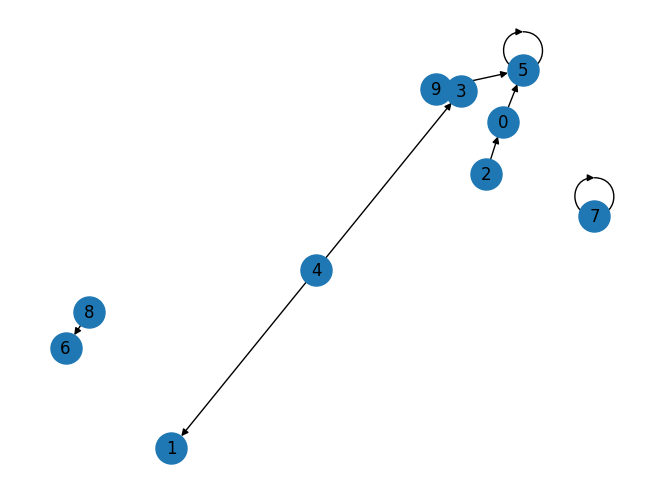

In [ ]:
show_graph_with_labels(adjacency_matrix)